<a href="https://colab.research.google.com/github/luizdalla/myfinance/blob/main/03_brazil_elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment setup and imports

In [1]:
!pip install yfinance -q

     |████████████████████████████████| 62 kB 717 kB/s 


In [2]:
import yfinance as yf
import pandas as pd
import plotly.express as px
from plotly.offline import plot

## Asset download Data

[*********************100%***********************]  1 of 1 completed


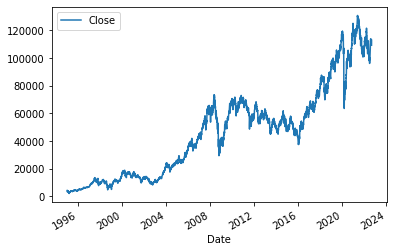

In [5]:
asset = yf.download('^BVSP', start='1995-01-01')[['Close']]
#asset = yf.download('PETR4.SA', start='1995-01-01')[['Close']]
#asset = yf.download('ITSA4.SA', start='1995-01-01')[['Close']]
# asset = yf.download('USDBRL=X', start='1995-01-01')[['Close']]
asset.plot();

## Data Treatment

In [6]:
df = asset.copy()

In [7]:
df['ano'] = df.index.year
df['dia_do_ano'] = df.index.dayofyear
df

,Close,ano,dia_do_ano
Date,,,
1995-01-02,4301.000000,1995,2
1995-01-03,4098.000000,1995,3
1995-01-04,3967.899902,1995,4
1995-01-05,4036.699951,1995,5
1995-01-06,3827.399902,1995,6
...,...,...,...
2022-09-12,113407.000000,2022,255
2022-09-13,110794.000000,2022,256
2022-09-14,110547.000000,2022,257


In [8]:
tabela = df.pivot(index='dia_do_ano', columns='ano', values='Close')
tabela

ano,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
dia_do_ano,,,,,,,,,,,,,,,,,,,,,
2,4301.000000,4390.100098,6955.500000,10480.0,NaN,NaN,15425.0,13872.0,11603.0,22445.0,...,62550.0,50341.0,48512.0,NaN,59589.0,77891.0,91012.0,118573.0,NaN,NaN
3,4098.000000,4681.500000,6997.799805,NaN,NaN,16930.0,16599.0,14265.0,11600.0,NaN,...,63312.0,50981.0,NaN,NaN,61814.0,77995.0,91564.0,117707.0,NaN,103922.0
4,3967.899902,4684.100098,NaN,NaN,6942.0,15851.0,16675.0,14332.0,NaN,NaN,...,62523.0,NaN,NaN,42141.0,61589.0,78647.0,91841.0,NaN,118558.0,103514.0
5,4036.699951,4694.299805,NaN,10607.0,7111.0,16245.0,16410.0,NaN,NaN,23532.0,...,NaN,NaN,47517.0,42419.0,62071.0,79071.0,NaN,NaN,119223.0,101006.0
6,3827.399902,NaN,7159.500000,10185.0,7331.0,16107.0,NaN,NaN,12020.0,23576.0,...,NaN,50974.0,48001.0,41773.0,61665.0,NaN,NaN,116878.0,119851.0,101561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,4346.299805,6957.799805,NaN,NaN,16011.0,14795.0,13756.0,11234.0,NaN,NaN,...,51267.0,NaN,NaN,58620.0,76073.0,85460.0,116534.0,NaN,105531.0,NaN
362,4299.000000,7006.899902,NaN,6899.0,16377.0,15186.0,13578.0,NaN,NaN,25937.0,...,NaN,NaN,43764.0,58697.0,76402.0,87887.0,NaN,NaN,104864.0,NaN
363,NaN,NaN,10052.000000,6715.0,16773.0,15259.0,NaN,NaN,22045.0,26117.0,...,NaN,50594.0,43654.0,59782.0,76402.0,NaN,NaN,119051.0,104107.0,NaN


In [9]:
tab = tabela.fillna(method='bfill')
tab = (tab/tab.iloc[0])-1
tab

ano,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
dia_do_ano,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.047198,0.066377,0.006081,0.012118,0.000000,0.000000,0.076110,0.028330,-0.000259,0.048429,...,0.012182,0.012713,-0.020510,0.000000,0.037339,0.001335,0.006065,-0.007304,0.000000,0.000000
4,-0.077447,0.066969,0.029329,0.012118,0.000000,-0.063733,0.081037,0.033160,0.035939,0.048429,...,-0.000432,0.012574,-0.020510,0.000000,0.033563,0.009706,0.009109,-0.014295,0.000000,-0.003926
5,-0.061451,0.069292,0.029329,0.012118,0.024345,-0.040461,0.063857,0.036548,0.035939,0.048429,...,-0.009864,0.012574,-0.020510,0.006597,0.041652,0.015149,0.007548,-0.014295,0.005609,-0.028060
6,-0.110114,0.079930,0.029329,-0.028149,0.056036,-0.048612,0.073712,0.036548,0.035939,0.050390,...,-0.009864,0.012574,-0.010533,-0.008733,0.034839,0.019104,0.007548,-0.014295,0.010906,-0.022719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.010532,0.584884,0.445187,-0.341698,1.306396,-0.126108,-0.108201,-0.190167,0.899940,0.155580,...,-0.180384,0.005026,-0.097873,0.391044,0.276628,0.097174,0.280425,0.004031,-0.109879,NaN
362,-0.000465,0.596068,0.445187,-0.341698,1.359118,-0.103012,-0.119741,-0.187716,0.899940,0.155580,...,-0.176547,0.005026,-0.097873,0.392872,0.282149,0.128333,0.274162,0.004031,-0.115505,NaN
363,NaN,0.603585,0.445187,-0.359256,1.416162,-0.098701,NaN,-0.187716,0.899940,0.163600,...,-0.176547,0.005026,-0.100140,0.418618,0.282149,NaN,0.274162,0.004031,-0.121890,NaN


## Data Visualization

In [12]:
anos = [1998, 2002, 2006, 2010, 2014, 2018]
#anos = [2002, 2006, 2010, 2014, 2018]
#anos = [2006, 2010, 2014, 2018]
fig = px.line(
    tab[anos],
    height=600,
    width=900,
    template='plotly_dark',
    title='IBOV - Election Years',
    labels={'value':'retorno'},
)

fig.update_traces(
    line=dict(width=1)
)

fig.add_scatter(
    x=tab.index,
    y=tab[2022],
    name='2022',
    line=dict(width=4)
)

fig.add_vline(x=pd.to_datetime('2022-10-01').dayofyear)
fig.add_vline(x=pd.to_datetime('2022-10-31').dayofyear)
fig.layout.yaxis.tickformat = '.0%'
fig